In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Library
import numpy as np        
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing dataset
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.shape

(9240, 37)

In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Text(0.5, 1.0, 'converted')

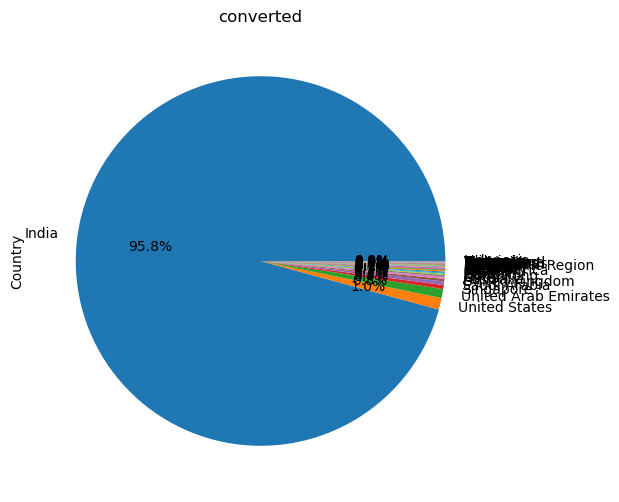

In [7]:
#From the data set, we understood that the moajorty of the country in dataset is india, lets check that
plt.figure(figsize=(10,6))
lead['Country'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('converted')

In [8]:
#Since 96% of data is India only, lets combine the rest 4% as others
lead['Country'] = lead['Country'].apply(lambda x: 'India' if x == 'India' else ('USA' if x == 'US' else 'Others'))
lead.Country

0       Others
1        India
2        India
3        India
4        India
         ...  
9235    Others
9236     India
9237     India
9238     India
9239    Others
Name: Country, Length: 9240, dtype: object

In [9]:
# identifying the data types
lead.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [10]:
#Identifying Columns
lead.columns.tolist()

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [11]:
# "Select" means not available, so making it as null value
lead.replace('Select', pd.NA, inplace=True)

In [12]:
#Checking if any of these columns have any missing values

In [13]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
##Converting the above data into percentage, so that we know how much percentage of each column values are missing

In [15]:
null_value_percent=lead.isnull().sum()*100/len(lead)
null_value_percent

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [16]:
##Sorting the missing values > 40% and creating a new data set with null values>40%

In [17]:
high_null_value_columns=null_value_percent[null_value_percent>=40]
high_null_value_columns

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [18]:
# Dropping the columns with null values >40%
df=lead.drop(columns=high_null_value_columns.index)
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,Interested in other courses,No,No,<NA>,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,Ringing,No,No,<NA>,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,wrong number given,No,No,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,invalid number,No,No,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,NaN,No,No,Other Metro Cities,No,No,SMS Sent


In [19]:
#prospect id is not a useful info, lets drop it
df.drop('Prospect ID', axis=1, inplace=True)

In [20]:
#lets replace yes or no with 1 & 0
df.replace({'Yes': 1, 'No': 0}, inplace=True)

In [21]:
#still there are some high null value percentage
#lets describe it
df.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.0,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.0,9240.0,9240.0,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,0.000108,0.000108,0.000433,0.000758,0.0,0.0,0.0,0.0,0.312554
std,23405.995698,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.0,0.014711,0.010403,0.010403,0.020803,0.027515,0.0,0.0,0.0,0.0,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


In [22]:
#Lets converst the catagorical variables
# Select columns with categorical data
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City', 'Last Notable Activity']


In [23]:
#Lets convert the categorical variables to dummy variables
df = pd.concat([df, pd.get_dummies(df[categorical_columns])], axis=1)

In [24]:
# lets drop all the original categorical variables
df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 
         'What is your current occupation', 'What matters most to you in choosing a course', 
         'Tags', 'City', 'Last Notable Activity'], axis=1, inplace=True)

In [25]:
#lets describe df again
df.describe(include='all')

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.0,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,...,0.000108,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108
std,23405.995698,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.0,0.014711,...,0.010403,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# For easier analysis, lets find the highly correlated variables both positive and negative

In [27]:
correlation_matrix = df.corr()

In [28]:
correlation_with_converted = correlation_matrix['Converted']

In [29]:
high_correlation_threshold = 0.2

In [30]:
high_correlation_variables = correlation_with_converted[abs(correlation_with_converted) > high_correlation_threshold]

In [31]:
high_correlation_matrix = df[high_correlation_variables.index].corr()


In [32]:
print(high_correlation_matrix)

                                                    Converted  \
Converted                                            1.000000   
Total Time Spent on Website                          0.362483   
Lead Origin_Lead Add Form                            0.321702   
Lead Source_Reference                                0.270830   
Last Activity_Olark Chat Conversation               -0.210809   
Last Activity_SMS Sent                               0.325600   
What is your current occupation_Working Profess...   0.313837   
What matters most to you in choosing a course_B...   0.329222   
Tags_Closed by Horizzon                              0.251229   
Tags_Ringing                                        -0.283895   
Tags_Will revert after reading the email             0.644307   
Last Notable Activity_Modified                      -0.244294   
Last Notable Activity_SMS Sent                       0.351845   

                                                    Total Time Spent on Website  \
Conver

In [33]:
#spliting the target variable "Converted" into two dataset for better visualization - converted & not converted (n_converted)

In [34]:
converted=lead[lead['Converted']==1]
n_converted=lead[lead['Converted']==0]

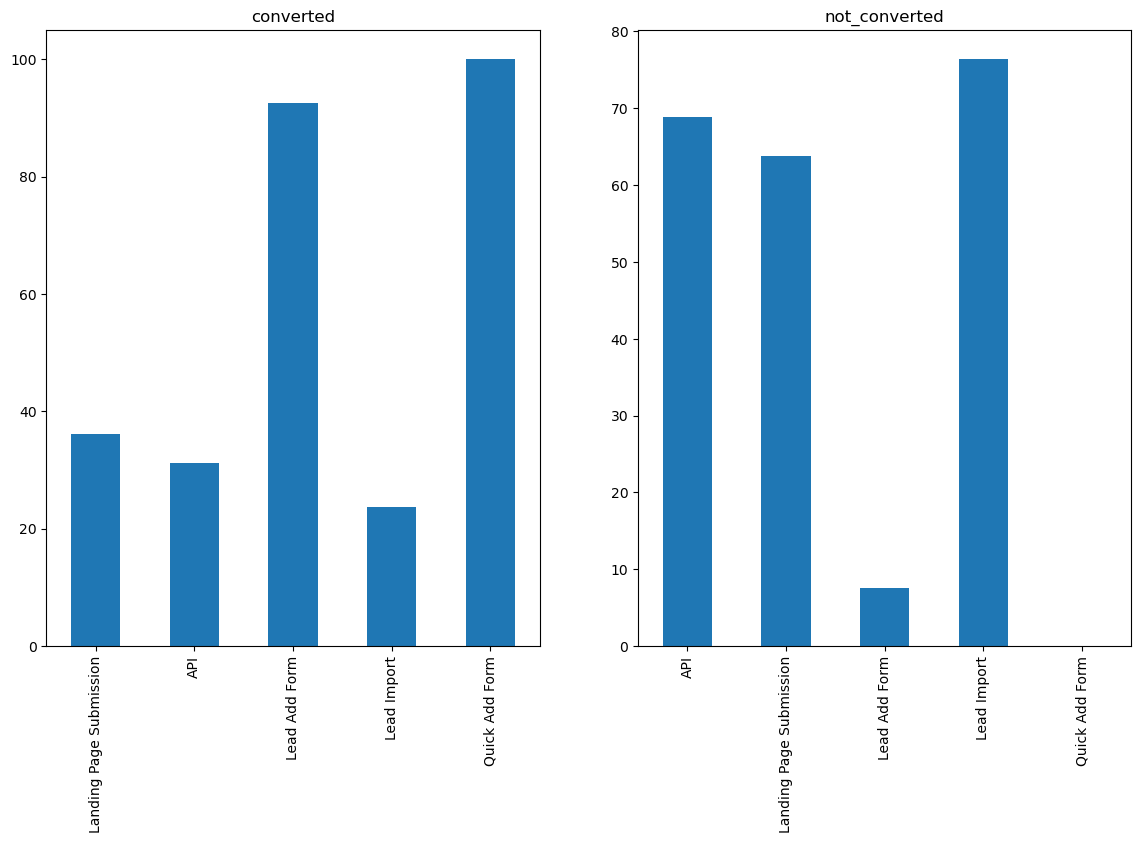

In [35]:
#Plotting Lead Origin
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
(converted['Lead Origin'].value_counts()*100/lead['Lead Origin'].value_counts()).plot.bar(rot=90)
plt.title('converted')
plt.subplot(1,2,2)
(n_converted['Lead Origin'].value_counts()*100/lead['Lead Origin'].value_counts()).plot.bar(rot=90)
plt.title('not_converted')
plt.show()

In [36]:
# Inferences
# 1. lead origin from Quick add forum and Lead add forum is very high likely to get converted
# 2. lead origin from Landing page submission, API and Lead import is unlikely to get converted

Text(0.5, 1.0, 'Total')

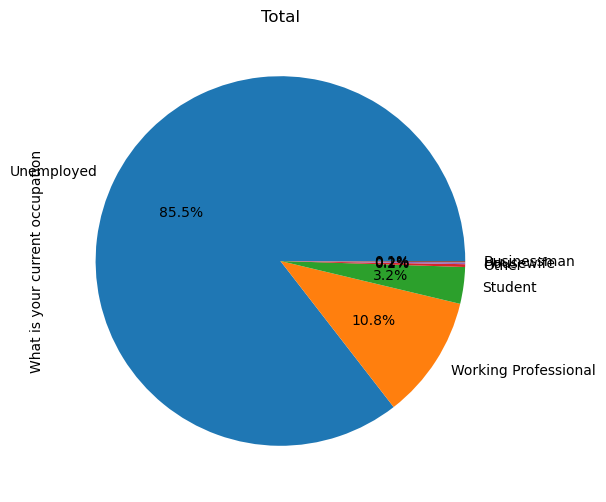

In [37]:
#Plotting Occupation
plt.figure(figsize=(10,6))
lead['What is your current occupation'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Total')

In [38]:
# unemployed is the highest number in leads and working professionals are the second highest

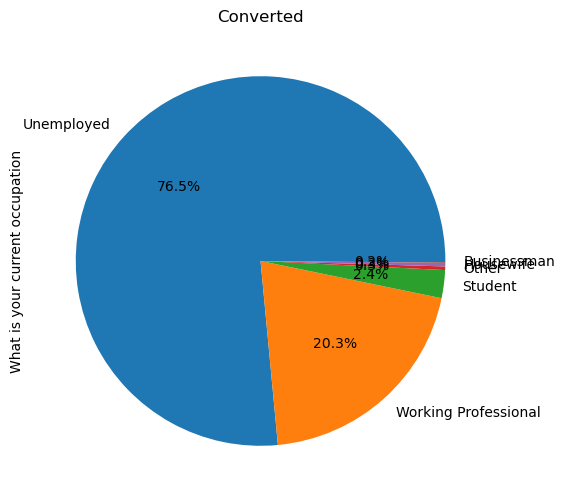

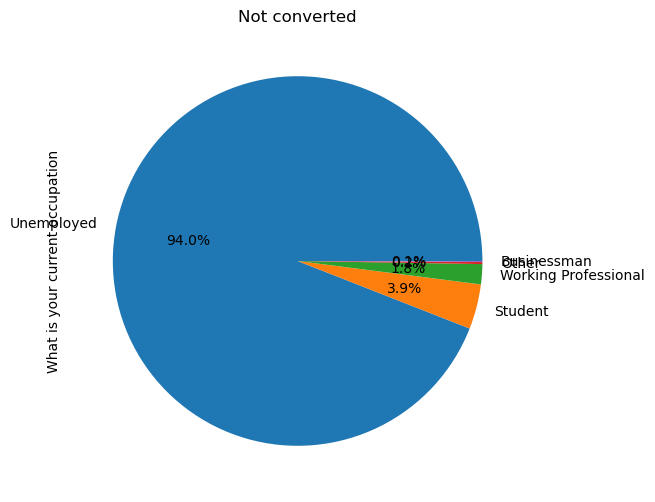

In [39]:
plt.figure(figsize=(10,6))
converted['What is your current occupation'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Converted')
plt.figure(figsize=(10,6))
n_converted['What is your current occupation'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Not converted')
plt.show()

In [40]:
# Working profesionals are very highly converted

Text(0.5, 1.0, 'not converted')

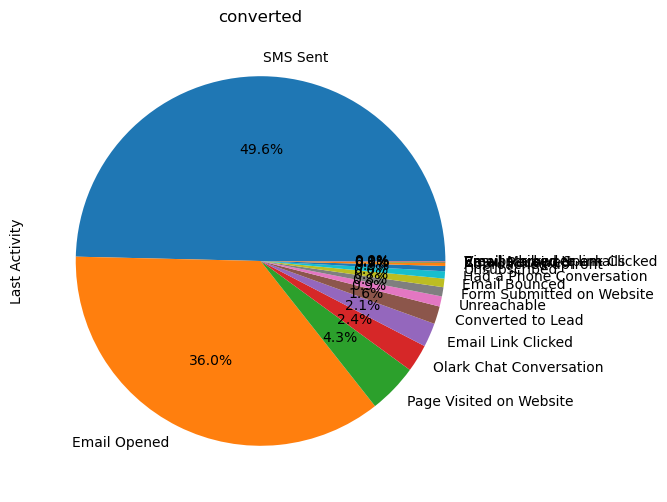

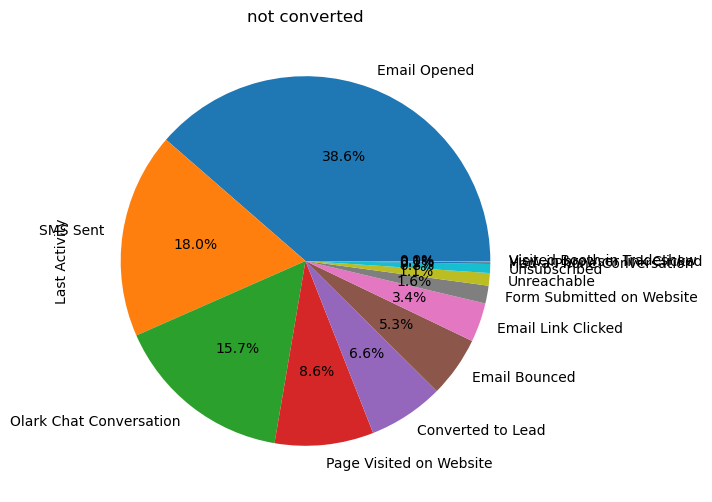

In [41]:
#Plotting Last activity
plt.figure(figsize=(10,6))
converted['Last Activity'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('converted')
plt.figure(figsize=(10,6))
n_converted['Last Activity'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('not converted')

In [42]:
# Last activity of both converted and not converted are majority in Email opened and SMS sent
#If the last activity is in OLark chat or page visited, they are unlikely to get converted. 

Text(0.5, 1.0, 'Not converted')

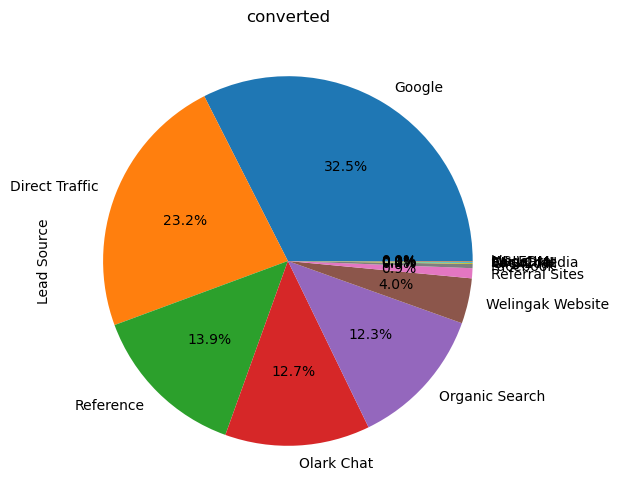

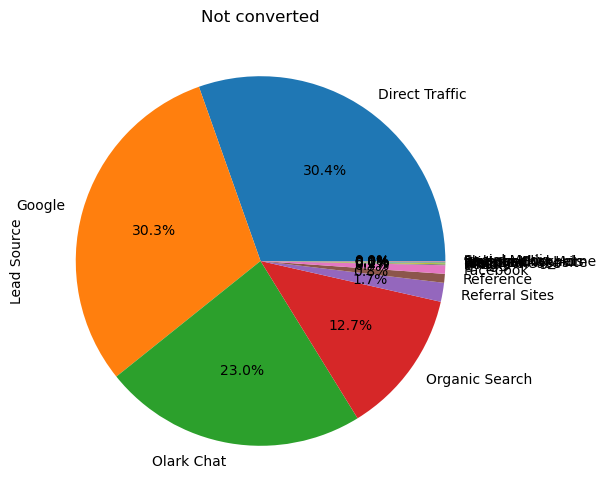

In [43]:
# Plotting Lead source
plt.figure(figsize=(10,6))
converted['Lead Source'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('converted')
plt.figure(figsize=(10,6))
n_converted['Lead Source'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Not converted')

In [44]:
# Lead source through reference is very high likely to get converted

Text(0.5, 1.0, 'Not converted')

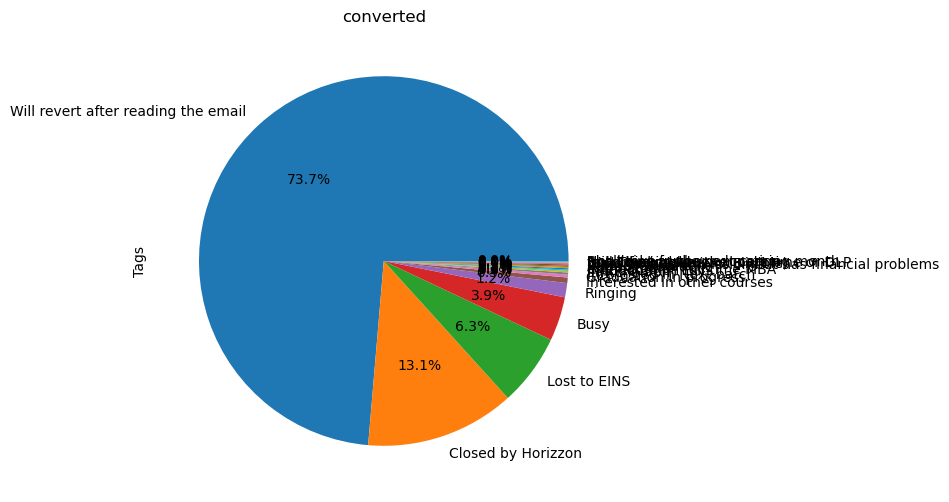

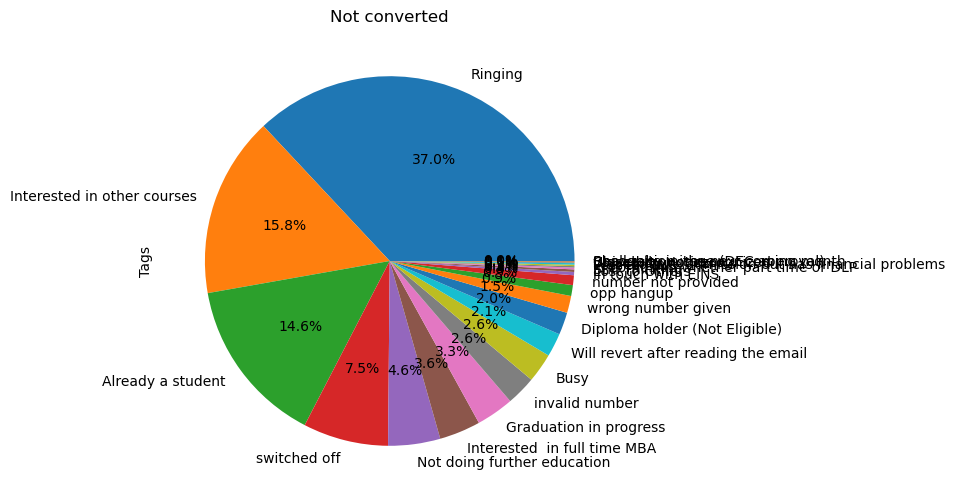

In [45]:
#Plotting Tags
plt.figure(figsize=(10,6))
converted['Tags'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('converted')
plt.figure(figsize=(10,6))
n_converted['Tags'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Not converted')

In [46]:
# Closed by horizon and will revert after mail are most likely to get converted compared to other tags

In [47]:
##Test-Train Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Putting feature variable to X
X = df.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
# Lets replace the null values in X with Mode

In [51]:
X.isnull().sum()

Do Not Email                                            0
Do Not Call                                             0
TotalVisits                                           137
Total Time Spent on Website                             0
Page Views Per Visit                                  137
                                                     ... 
Last Notable Activity_Resubscribed to emails            0
Last Notable Activity_SMS Sent                          0
Last Notable Activity_Unreachable                       0
Last Notable Activity_Unsubscribed                      0
Last Notable Activity_View in browser link Clicked      0
Length: 137, dtype: int64

In [52]:
X.fillna(df.mode().iloc[0], inplace=True)

In [53]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-0.645678,-0.885371,-1.062143,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.109111,0.005716,-0.452487,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.297808,-0.691418,0.083827,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.297808,1.365219,1.229797,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,-0.645678,-0.885371,-1.062143,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [57]:
### Checking the converted Rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.53896103896104

In [58]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
#Model Building

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [61]:
# Using RFE for Feature Selection

In [62]:
rfe = RFE(logreg, n_features_to_select=25)

In [63]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=25)

In [64]:
selected_features = X_train.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Facebook',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')


In [65]:
import statsmodels.api as sm

In [66]:
col = X_train.columns[rfe.support_]

In [67]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       ...
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=112)

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1120.7
Date:                Tue, 19 Dec 2023   Deviance:                       2241.5
Time:                        13:33:56   Pearson chi2:                 1.22e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6257
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.9811      0.108    -18.332      0.000      -2.193      -1.769
Do Not Email                                                             -0.9467      0.245     -3.870      0.000      -1.426      -0.467
Total Time Spent on Website                                               0.8489      0.057     14.963      0.000       0.738       0.960
Lead Source_Facebook                                                     -1.0828      0.687     -1.576      0.115      -2.430       0.264
Lead Source_Welingak Website                                              3.2097      0.743      4.318      0.000       1.753       4.667
Last Activity_SMS Sent                                                    2.0298      0.128     15.905      0.000       1.780       2.280
What matters most to you in choosing a course_Better Career Prospects     2.6318      0.153     17.167      0.000       2.331       2.932
Tags_Already a student                                                   -5.3515      0.729     -7.344      0.000      -6.780      -3.923
Tags_Busy                                                                -1.6598      0.257     -6.449      0.000      -2.164      -1.155
Tags_Closed by Horizzon                                                   5.9637      1.016      5.873      0.000       3.973       7.954
Tags_Diploma holder (Not Eligible)                                      -24.9829   1.73e+04     -0.001      0.999   -3.39e+04    3.38e+04
Tags_Graduation in progress                                              -2.5492      0.529     -4.822      0.000      -3.585      -1.513
Tags_Interested  in full time MBA                                        -3.9495      0.749     -5.271      0.000      -5.418      -2.481
Tags_Interested in other courses                                         -3.6005      0.364     -9.894      0.000      -4.314      -2.887
Tags_Lost to EINS                                                         5.8405      0.754      7.746      0.000       4.363       7.318
Tags_Not doing further education                                         -4.7557      1.025     -4.638      0.000      -6.766      -2.746
Tags_Ringing                                                             -5.4255      0.267    -20.350      0.000      -5.948      -4.903
Tags_Will revert after reading the email                                  2.6601      0.202     13.178      0.000       2.264       3.056
Tags_invalid number                                                      -5.9713      1.110     -5.379      0.000      -8.147      -3.795
Tags_number not provided                       

In [69]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)


In [70]:
# Checking the probability of conversion 

In [71]:
y_train_pred = 1 / (1 + np.exp(-y_train_pred))

In [72]:
y_train_pred[:100]

1871    0.500991
6795    0.658872
3516    0.501168
8105    0.542385
3934    0.539026
          ...   
8132    0.501382
8542    0.500597
8652    0.503291
6998    0.501260
3146    0.729404
Length: 100, dtype: float64

In [73]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:100]

array([0.50099113, 0.65887198, 0.5011677 , 0.54238462, 0.53902649,
       0.73086492, 0.50113039, 0.7294639 , 0.51129243, 0.73088241,
       0.72773753, 0.71058023, 0.71917355, 0.72791004, 0.50025779,
       0.51526287, 0.51526287, 0.5017452 , 0.51526287, 0.72312907,
       0.58324219, 0.72828676, 0.73064243, 0.73098799, 0.72991049,
       0.72773924, 0.51861005, 0.7305696 , 0.72976794, 0.50318519,
       0.73074185, 0.50124603, 0.72723499, 0.5018077 , 0.7211744 ,
       0.50125958, 0.50534163, 0.53633964, 0.67395278, 0.50288629,
       0.50172912, 0.58434063, 0.50157091, 0.51246925, 0.52086441,
       0.5767925 , 0.51526287, 0.5       , 0.61917429, 0.72940405,
       0.5       , 0.7298348 , 0.73026599, 0.72987471, 0.702182  ,
       0.50106696, 0.72957348, 0.56230325, 0.61089473, 0.52372225,
       0.5032913 , 0.51979252, 0.73076685, 0.50148871, 0.51942798,
       0.5032913 , 0.73082743, 0.73085943, 0.58183347, 0.73082534,
       0.51254256, 0.53253117, 0.58204159, 0.50180042, 0.52310

In [74]:
## Creating a dataframe with the actual churn flag and the predicted probabilities

In [75]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_pred_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_pred_prob,Lead Number
0,0,0.500991,1871
1,0,0.658872,6795
2,0,0.501168,3516
3,0,0.542385,8105
4,0,0.539026,3934


In [76]:
bins = np.arange(0, 1.11, 0.1)
y_train_pred_final['Converted_pred_prob'] = pd.cut(y_train_pred, bins, labels=False) * 0.1
y_train_pred_final.head()

,Converted,Converted_pred_prob,Lead Number
0,0,0.5,1871
1,0,0.6,6795
2,0,0.5,3516
3,0,0.5,8105
4,0,0.5,3934


In [77]:
y_train_pred_final.head()

,Converted,Converted_pred_prob,Lead Number
0,0,0.5,1871
1,0,0.6,6795
2,0,0.5,3516
3,0,0.5,8105
4,0,0.5,3934


In [78]:
# Setting the Cutoff
y_train_pred_final['predicted'] = y_train_pred_final.Converted_pred_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_pred_prob,Lead Number,predicted
0,0,0.5,1871,0
1,0,0.6,6795,1
2,0,0.5,3516,0
3,0,0.5,8105,0
4,0,0.5,3934,0


In [79]:
from sklearn import metrics

In [80]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3790  212]
 [ 198 2268]]


In [81]:
# Predicted     not_converted    converted
# Actual
# not_converted        3952      50
# converted            654       1812  

In [82]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9366110080395794


In [83]:
##Checking VIFs

In [84]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
pd.set_option('display.max_colwidth', None)

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,What matters most to you in choosing a course_Better Career Prospects,9.13
16,Tags_Will revert after reading the email,3.72
15,Tags_Ringing,2.58
12,Tags_Interested in other courses,1.69
6,Tags_Already a student,1.67
4,Last Activity_SMS Sent,1.57
23,Last Notable Activity_Modified,1.49
8,Tags_Closed by Horizzon,1.49
20,Tags_switched off,1.34
14,Tags_Not doing further education,1.24


In [87]:
# Let's drop 'What matters most to you in choosing a course_Better Career Prospects' since it has a high VIF
col = col.drop('What matters most to you in choosing a course_Better Career Prospects')
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Facebook',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1288.0
Date:                Tue, 19 Dec 2023   Deviance:                       2576.0
Time:                        13:33:57   Pearson chi2:                 1.16e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6059
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1438      0.081    -14.145      0.000      -1.302      -0.985
Do Not Email                                     -0.7145      0.224     -3.183      0.001      -1.154      -0.275
Total Time Spent on Website                       0.8138      0.052     15.678      0.000       0.712       0.916
Lead Source_Facebook                             -0.5729      0.711     -0.805      0.421      -1.967       0.821
Lead Source_Welingak Website                      5.0506      0.739      6.836      0.000       3.602       6.499
Last Activity_SMS Sent                            1.9408      0.114     16.959      0.000       1.717       2.165
Tags_Already a student                           -3.5146      0.720     -4.881      0.000      -4.926      -2.103
Tags_Busy                                         0.2107      0.228      0.925      0.355      -0.236       0.657
Tags_Closed by Horizzon                           7.8879      1.011      7.800      0.000       5.906       9.870
Tags_Diploma holder (Not Eligible)              -23.1070   1.72e+04     -0.001      0.999   -3.38e+04    3.37e+04
Tags_Graduation in progress                      -0.6849      0.517     -1.326      0.185      -1.698       0.328
Tags_Interested  in full time MBA                -2.0617      0.742     -2.780      0.005      -3.515      -0.608
Tags_Interested in other courses                 -1.7388      0.345     -5.047      0.000      -2.414      -1.064
Tags_Lost to EINS                                 6.1465      0.731      8.405      0.000       4.713       7.580
Tags_Not doing further education                 -2.9217      1.020     -2.866      0.004      -4.920      -0.923
Tags_Ringing                                     -3.5345      0.231    -15.276      0.000      -3.988      -3.081
Tags_Will revert after reading the email          4.5268      0.177     25.539      0.000       4.179       4.874
Tags_invalid number                              -4.0740      1.090     -3.736      0.000      -6.211      -1.937
Tags_number not provided                        -23.9892   2.46e+04     -0.001      0.999   -4.83e+04    4.82e+04
Tags_opp hangup                                  -1.6666      0.784     -2.125      0.034      -3.204      -0.129
Tags_switched off                                -3.7346      0.525     -7.120      0.000      -4.763      -2.706
Tags_wrong number given                         -24.2066   2.06e+04     -0.001      0.999   -4.04e+04    4.03e+04
Last Notable Activity_Email Link Clicked         -1.1713      0.462     -2.535      0.011      -2.077      -0.266
Last Notable Activity_Modified                   -1.7575      0.124    -14.180      0.000      -2.000      -1.515
Last 

In [89]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3790  212]
 [ 198 2268]]


In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last Activity_SMS Sent,1.49
22,Last Notable Activity_Modified,1.48
15,Tags_Will revert after reading the email,1.37
0,Do Not Email,1.13
11,Tags_Interested in other courses,1.12
1,Total Time Spent on Website,1.12
14,Tags_Ringing,1.11
7,Tags_Closed by Horizzon,1.08
5,Tags_Already a student,1.06
19,Tags_switched off,1.04


In [91]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9366110080395794


In [92]:
##Metrics beyond simply accuracy

In [93]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [94]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9197080291970803

In [95]:
# Let us calculate specificity
TN / float(TN+FP)

0.9470264867566217

In [96]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05297351324337831


In [97]:
# positive predictive value 
print (TP / float(TP+FP))

0.9145161290322581


In [98]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9503510531594784


In [99]:
##Plotting the ROC Curve

In [100]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [101]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.predicted, drop_intermediate = False )

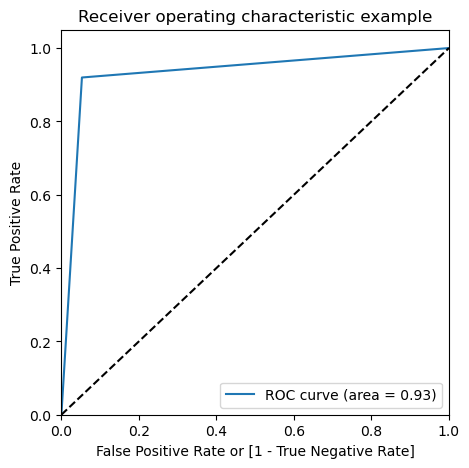

In [102]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.predicted)

In [103]:
##Finding Optimal Cutoff Point


In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_pred_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_pred_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.5,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.6,6795,1,1,1,1,1,1,1,1,0,0,0
2,0,0.5,3516,0,1,1,1,1,1,0,0,0,0,0
3,0,0.5,8105,0,1,1,1,1,1,0,0,0,0,0
4,0,0.5,3934,0,1,1,1,1,1,0,0,0,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Converted'], (y_train_pred_final[i] > i).astype(int))

    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df = cutoff_df.append({'prob': i, 'accuracy': accuracy, 'sensi': sensi, 'speci': speci}, ignore_index=True)
print(cutoff_df)

   prob  accuracy     sensi     speci
0   0.0  0.381262  1.000000  0.000000
1   0.1  0.381262  1.000000  0.000000
2   0.2  0.381262  1.000000  0.000000
3   0.3  0.381262  1.000000  0.000000
4   0.4  0.381262  1.000000  0.000000
5   0.5  0.936611  0.919708  0.947026
6   0.6  0.936611  0.919708  0.947026
7   0.7  0.912956  0.793593  0.986507
8   0.8  0.618738  0.000000  1.000000
9   0.9  0.618738  0.000000  1.000000


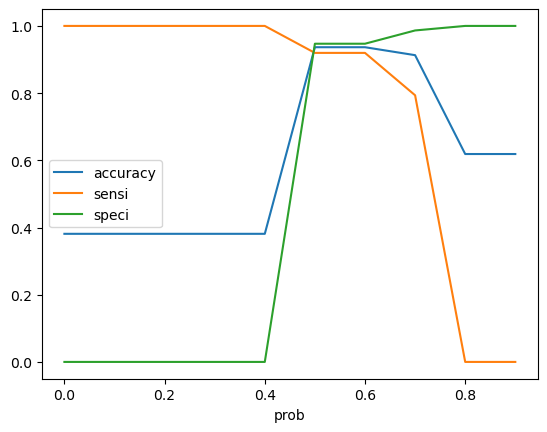

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [107]:
# From the above graph, our current Cutoff point is the Optimum cutoff

In [108]:
y_train_pred_final['final_predicted'] =y_train_pred_final.Converted_pred_prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_pred_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.5,1871,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0.6,6795,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.5,3516,0,1,1,1,1,1,0,0,0,0,0,0
3,0,0.5,8105,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.5,3934,0,1,1,1,1,1,0,0,0,0,0,0


In [109]:
y_train_pred_final.describe()

,Converted,Converted_pred_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.0,6468.0,6468.0,6468.0,6468.000000,6468.000000,6468.000000,6468.0,6468.0,6468.000000
mean,0.381262,0.569434,4620.101732,0.383426,1.0,1.0,1.0,1.0,1.0,0.383426,0.383426,0.310915,0.0,0.0,0.383426
std,0.485734,0.091334,2665.693664,0.486258,0.0,0.0,0.0,0.0,0.0,0.486258,0.486258,0.462904,0.0,0.0,0.486258
min,0.000000,0.500000,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,0.500000,2314.750000,0.000000,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,0.000000,0.500000,4594.500000,0.000000,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,1.000000,0.700000,6924.250000,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,0.700000,9239.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000


In [110]:
#Precision and recall tradeoff

In [111]:
from sklearn.metrics import precision_recall_curve

In [112]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [113]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_pred_prob)

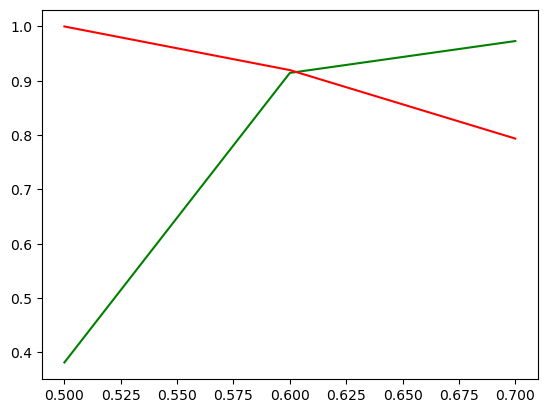

In [114]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [115]:
#Preparing the test set

In [116]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0,0,1.324501,0.933036,2.660405,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2376,0,0,-0.944318,-0.900812,-1.108316,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,0,0,0.473694,-0.793792,1.247135,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9199,0,0,-0.944318,-0.900812,-1.108316,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,0,0,-0.944318,-0.900812,-1.108316,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Facebook,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,...,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0,0.933036,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,0,-0.900812,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7766,0,-0.793792,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9199,0,-0.900812,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,0,-0.900812,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [118]:
X_test_sm = sm.add_constant(X_test)

In [119]:
#Making predictions on the test set

In [120]:
y_test_pred = res.predict(X_test_sm)

In [121]:
y_test_pred[:10]

4269    0.825825
2376    0.989957
7766    0.939176
9199    0.000785
4359    0.934007
9186    0.995906
1631    0.984407
8963    0.954589
8007    0.042025
5324    0.992053
dtype: float64

In [122]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [123]:
# Let's see the head
y_pred_1.head()

,0
4269,0.825825
2376,0.989957
7766,0.939176
9199,0.000785
4359,0.934007


In [124]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [125]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [126]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [127]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [128]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.825825
1,1,2376,0.989957
2,1,7766,0.939176
3,0,9199,0.000785
4,1,4359,0.934007


In [129]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [130]:
y_pred_final = y_pred_final.reindex(['Lead Number', 'Converted', 'Converted_Prob'], axis=1)

In [131]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,4269,1,0.825825
1,2376,1,0.989957
2,7766,1,0.939176
3,9199,0,0.000785
4,4359,1,0.934007


In [132]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [133]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,4269,1,0.825825,1
1,2376,1,0.989957,1
2,7766,1,0.939176,1
3,9199,0,0.000785,0
4,4359,1,0.934007,1


In [134]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9282106782106783

In [135]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1570,  107],
       [  92, 1003]], dtype=int64)

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9159817351598174

In [138]:
# Let us calculate specificity
TN / float(TN+FP)

0.936195587358378

In [139]:
## Model shows very good Acccuracy, Specificity and Sensitivity in Test and train set consistently
## Metric        Test   Train
#  Acccuracy     0.928   0.936
#  Specificity   0.936   0.947
#  Sensitivity   0.916   0.919